#### CIS 9 - Lab 2
Topics: Pandas, Matplotlib

In [221]:
# Name: Nitya Kashyap
### all of clare's comments start with "###"

In this lab you will analyze the current world population.<br>
The data is from the [worldpopulationreview](https://worldpopulationreview.com/) website and contains the information for countries of the world.<br>
The data is in the input file `world.csv`

There are 2 main parts to this lab:<br>
A. Data cleaning<br>
B. Data analysis and visualization

In [222]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Part A: Data Cleaning

1. __Read data from `world.csv` into a DataFrame__.<br>
Then __print the DataFrame__.<br>

_Make sure to use Jupyter notebook's graphical print and not Python's text print() function._<br>
_This applies to all DataFrame printing_.

In [223]:
df = pd.read_csv("world.csv")
df

,rank,2023,2022,area,land_area,density,growth,world %,name
0,1,"1,425,768,271","1,417,173,173",3.3M,3M,481,0.81%,17.85%,India
1,2,"1,425,743,821","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,China
2,3,"339,212,631","338,289,857",9.4M,9.1M,37,0.50%,4.25%,United States
3,4,"276,553,195","275,501,339",1.9M,1.9M,148,0.74%,3.47%,Indonesia
4,5,"238,468,483","235,824,862",881.9K,770.9K,312,1.98%,3.00%,Pakistan
...,...,...,...,...,...,...,...,...,...
200,218,"33,642","33,660",61,60,561,-0.05%,0.00%,San Marino
201,222,"18,058","18,055",459,460,39,0.02%,0.00%,Palau
202,225,"12,780","12,668",21,20,639,0.88%,0.00%,Nauru
203,227,"11,396","11,312",26,30,380,0.74%,0.00%,Tuvalu


2. __Check to see if there are any NaN__ in the data.<br>
The output should be the column names and the number of NaNs in the column.

In [224]:
print("NaN values present (in each column):")
print(df.isna().sum())

NaN values present (in each column):
rank         0
2023         0
2022         0
area         0
land_area    0
density      0
growth       0
world %      0
name         0
dtype: int64


3a. __Check the data type of each column__.<br>
The output should be the columns names and the data type of the column.

In [225]:
print("column, data type:")
df.dtypes

column, data type:


rank          int64
2023         object
2022         object
area         object
land_area    object
density      object
growth       object
world %      object
name         object
dtype: object

3b. __Create a Raw NBConvert cell__ to __explain the data types of the columns__.

4a. Since we will be analyzing the population, we want to read them in as numbers.<br>
__Read data again from world.csv into a DataFrame__, but this time let the DataFrame convert the population strings into numbers during the reading.<br>
Then __show the first 5 rows of the DataFrame__.

In [226]:
df = pd.read_csv("world.csv", thousands=",")
print("first 5 rows:")
display(df.head())

first 5 rows:


,rank,2023,2022,area,land_area,density,growth,world %,name
0,1,1425768271,1417173173,3.3M,3M,481.0,0.81%,17.85%,India
1,2,1425743821,1425887337,9.7M,9.4M,151.0,-0.02%,17.81%,China
2,3,339212631,338289857,9.4M,9.1M,37.0,0.50%,4.25%,United States
3,4,276553195,275501339,1.9M,1.9M,148.0,0.74%,3.47%,Indonesia
4,5,238468483,235824862,881.9K,770.9K,312.0,1.98%,3.00%,Pakistan


4b. __Show the data types of each column__.

In [227]:
df.dtypes

rank           int64
2023           int64
2022           int64
area          object
land_area     object
density      float64
growth        object
world %       object
name          object
dtype: object

5. We also want to analyze the growth and world % columns.<br>
__Convert the growth and world % data into numbers__ by removing the % sign and convert to float.<br>
Then __print the DataFrame__.

_You should not have to use a loop, take advantage of string vectorization to remove the % instead._

In [228]:
df.growth = df.growth.str.extract('(-*\d+\.\d+)').astype("float64")
df["world %"] = df["world %"].str.extract('(-*\d+\.\d+)').astype("float64")
df

,rank,2023,2022,area,land_area,density,growth,world %,name
0,1,1425768271,1417173173,3.3M,3M,481.0,0.81,17.85,India
1,2,1425743821,1425887337,9.7M,9.4M,151.0,-0.02,17.81,China
2,3,339212631,338289857,9.4M,9.1M,37.0,0.50,4.25,United States
3,4,276553195,275501339,1.9M,1.9M,148.0,0.74,3.47,Indonesia
4,5,238468483,235824862,881.9K,770.9K,312.0,1.98,3.00,Pakistan
...,...,...,...,...,...,...,...,...,...
200,218,33642,33660,61,60,561.0,-0.05,0.00,San Marino
201,222,18058,18055,459,460,39.0,0.02,0.00,Palau
202,225,12780,12668,21,20,639.0,0.88,0.00,Nauru
203,227,11396,11312,26,30,380.0,0.74,0.00,Tuvalu


6. We don't need the rank, area, and land_area in our analysis.<br>
__Remove the rank, area, land_area columns__ and __print the DataFrame__.

In [229]:
df = df.drop(columns=["rank", "area", "land_area"])
df

,2023,2022,density,growth,world %,name
0,1425768271,1417173173,481.0,0.81,17.85,India
1,1425743821,1425887337,151.0,-0.02,17.81,China
2,339212631,338289857,37.0,0.50,4.25,United States
3,276553195,275501339,148.0,0.74,3.47,Indonesia
4,238468483,235824862,312.0,1.98,3.00,Pakistan
...,...,...,...,...,...,...
200,33642,33660,561.0,-0.05,0.00,San Marino
201,18058,18055,39.0,0.02,0.00,Palau
202,12780,12668,639.0,0.88,0.00,Nauru
203,11396,11312,380.0,0.74,0.00,Tuvalu


7. __Check that all data are now numbers except for the country names__.

In [230]:
print("column, data type:")
df.dtypes

column, data type:


2023         int64
2022         int64
density    float64
growth     float64
world %    float64
name        object
dtype: object

8. Now that all data are numbers and can be used for analysis, the last step is to make the country names the index column of the DataFrame. This way it will be easier to select the row for "United States" by using the country name instead of index 2.<br>
__Change the index to the country names__.<br>
Then __print the DataFrame__.

In [231]:
df.set_index("name", inplace=True)
df

,2023,2022,density,growth,world %
name,,,,,
India,1425768271,1417173173,481.0,0.81,17.85
China,1425743821,1425887337,151.0,-0.02,17.81
United States,339212631,338289857,37.0,0.50,4.25
Indonesia,276553195,275501339,148.0,0.74,3.47
Pakistan,238468483,235824862,312.0,1.98,3.00
...,...,...,...,...,...
San Marino,33642,33660,561.0,-0.05,0.00
Palau,18058,18055,39.0,0.02,0.00
Nauru,12780,12668,639.0,0.88,0.00


---

#### Part B: Data Analysis and Visualization

9a. First, we look at an overview of the world population:
- Are most countries in the same small range of population, or is the population uniformly distributed?
- What is that range? 
- Are there any outliers?

__Use an _appropriate_ plot to show the population of the countries__, such that the answers to the 3 questions can be inferred from the plot.

_The plot should have a title and appropriate axis labels_.<br>
_If the plot you choose has keyword arguments that we've discussed in class, use them to make the plot as clear as possible_.

(array([180.,  12.,   5.,   3.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.]),
 array([5.18000000e+02, 5.70312281e+07, 1.14061938e+08, 1.71092648e+08,
        2.28123358e+08, 2.85154069e+08, 3.42184779e+08, 3.99215489e+08,
        4.56246199e+08, 5.13276909e+08, 5.70307619e+08, 6.27338329e+08,
        6.84369039e+08, 7.41399750e+08, 7.98430460e+08, 8.55461170e+08,
        9.12491880e+08, 9.69522590e+08, 1.02655330e+09, 1.08358401e+09,
        1.14061472e+09, 1.19764543e+09, 1.25467614e+09, 1.31170685e+09,
        1.36873756e+09, 1.42576827e+09]),
 <BarContainer object of 25 artists>)

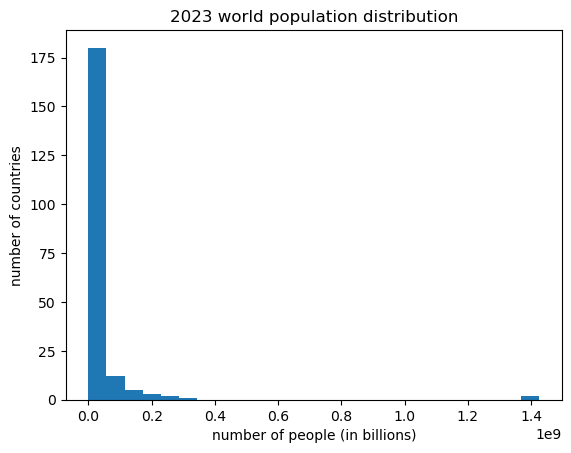

In [232]:
plt.title("2023 world population distribution")
plt.xlabel("number of people (in billions)")
plt.ylabel("number of countries")
plt.hist(df["2023"], bins = 25)

9b. Create a Raw NBConvert cell to __answer the 3 questions of part a__ by referring to your plot.

10. Next we investigate the growth rates of the countries of the world.

10a. __Show the rows of the top 15 countries with the highest growth percentage__, sorted by highest to lowest growth rate.

In [233]:
df.sort_values(by="growth", ascending=False, inplace=True)
fifteen = df.head(15)
fifteen

,2023,2022,density,growth,world %
name,,,,,
Moldova,3488553,3272996,104.0,4.98,0.04
Syria,22742622,22125249,126.0,4.98,0.29
Niger,26769724,26207977,21.0,3.80,0.34
Dr Congo,100846063,99010212,45.0,3.29,1.28
Chad,18038396,17723315,15.0,3.13,0.23
Somalia,17905905,17597511,29.0,3.10,0.23
Mali,22990110,22593590,19.0,3.10,0.29
Angola,36209255,35588987,29.0,3.08,0.46
Mayotte,331947,326101,898.0,3.03,0.00


10b. __Use an _appropriate_ plot to show the growth percentage of the 15 countries with high growth__.<br>
The plot should have a title and axis labels.<br>
The country names should appear clearly on the plot, not too small or overlapping each other.

<BarContainer object of 15 artists>

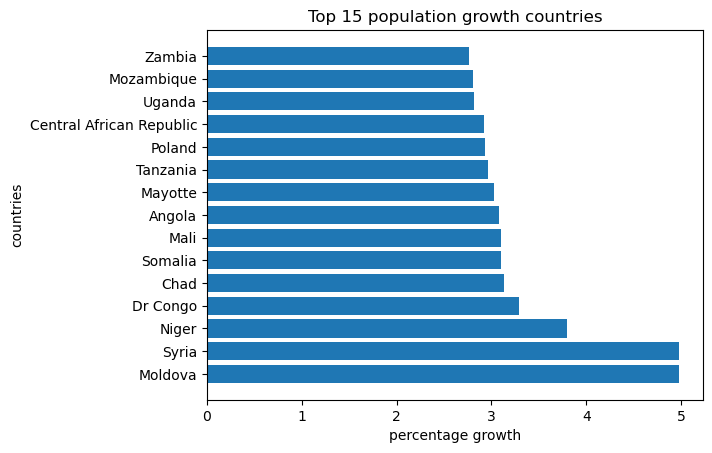

In [234]:
plt.title("Top 15 population growth countries")
plt.xlabel("percentage growth")
plt.ylabel("countries")
plt.barh(fifteen.index, fifteen.growth, align="center")

10c. Create a Raw NBConvert cell to answer the following questions about the 15 top growing countries (do some online look up if needed):
1. What continent are most countries in?
2. What are the only countries not in the continent of your answer 1, and why do you think they have a high growth percentage recently?
3. Of the 2 countries in Europe, why does Poland *not* have the higher growth rate, even though they seem to have a high population movement in the news?<br>
To answer question 3, create a Code cell to print data from the DataFrame to back your explanation.

In [235]:
# 3 continued:
print(f"Ukraine's growth rate is {df.at['Ukraine', 'growth']}%. Compare this to the median growth rate of all the countries: {df.growth.median()}%.")

Ukraine's growth rate is -7.45%. Compare this to the median growth rate of all the countries: 0.89%.


In [ ]:
### Poland is also right next to Ukraine, and probably received as many refugees as Moldova
### but Moldova is smaller so their percent change is higher

11a. Now let's look at the negative growth percentage.<br>
__Show the rows of the top 15 countries with the smallest growth rate__, sorted by smallest to largest growth.<br>
_Hint: the smallest growth rate is negative_

In [236]:
bottom_fifteen = df.tail(15).sort_values(by="growth") # smallest growth rate is the most negative one
bottom_fifteen

,2023,2022,density,growth,world %
name,,,,,
Ukraine,36167142,39701739,63.0,-7.45,0.46
Lebanon,5414648,5489739,523.0,-2.47,0.07
Bulgaria,6724148,6781953,62.0,-1.39,0.08
Lithuania,2729146,2750055,43.0,-1.15,0.03
Latvia,1838307,1850651,29.0,-1.10,0.02
Serbia,7176063,7221365,82.0,-1.00,0.09
Bosnia And Herzegovina,3218943,3233526,63.0,-0.70,0.04
Croatia,4018062,4030358,72.0,-0.54,0.05
Maldives,522370,523787,1737.0,-0.53,0.01


11b. __Use an _appropriate_ plot to show the growth percentage of the 15 countries with low growth__.<br>
The plot should have a title and axis labels.

<BarContainer object of 15 artists>

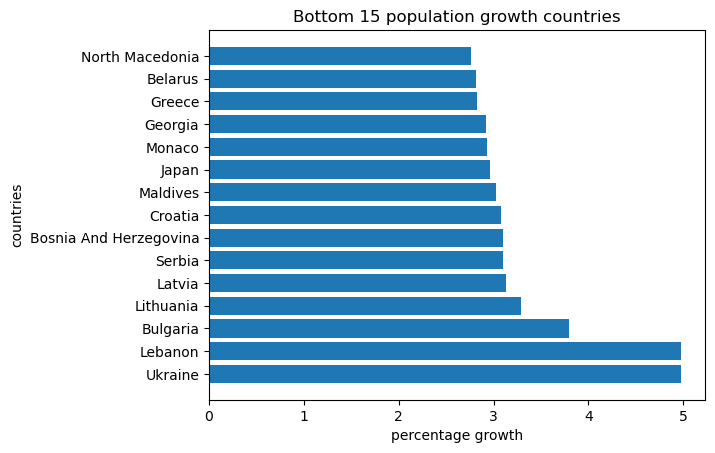

In [237]:
plt.title("Bottom 15 population growth countries")
plt.xlabel("percentage growth")
plt.ylabel("countries")
plt.barh(bottom_fifteen.index, bottom_fifteen.growth, align="center")

In [ ]:
### this looks more like the most growth data       -1pt
# yeah i accidentally put fifteen's data instead of bottom_fifteen's data before i submitted loll (it's been changed now)

12. Next, we look at the population density.

12a. __Print the names of all countries that are in the 75th percentile in population density__.<br>
Then __print the names of all countries that are in the 25th percentile in population density__.

_Since there will be many countries, print the countries of each percentile as one long, comma separated line of country names._
_Make sure print a header line of text to explain which percentile is being printed. Don't just print 2 lines of country names_.

In [261]:
print("Countries in the 75th percentile or above in population density:") 
print(", ".join(df[df.density>=np.percentile(df.density, 75)].index.values))
print("Countries in the 25th percentile or below in population density: ") 
print(", ".join(df[df.density<=np.percentile(df.density, 25)].index.values))

Countries in the 75th percentile or above in population density:
Mayotte, Uganda, Burundi, Gambia, Nigeria, Palestine, Rwanda, Pakistan, Sao Tome And Principe, Comoros, Vatican City, Philippines, Israel, Haiti, Luxembourg, Bangladesh, Kuwait, Dominican Republic, Bahrain, Nauru, India, Reunion, Qatar, Tuvalu, Vietnam, Liechtenstein, Singapore, Grenada, El Salvador, United Kingdom, Malta, Netherlands, Sri Lanka, Belgium, Trinidad And Tobago, Puerto Rico, Saint Lucia, Taiwan, Barbados, Mauritius, Hong Kong, Guadeloupe, San Marino, Jamaica, South Korea, Germany, Martinique, Saint Vincent And The Grenadines, Monaco, Maldives, Japan, Lebanon
Countries in the 25th percentile or below in population density: 
Niger, Chad, Somalia, Mali, Angola, Central African Republic, Zambia, Mauritania, Sudan, French Guiana, Vanuatu, Republic Of The Congo, Solomon Islands, Gabon, Western Sahara, Venezuela, Papua New Guinea, Eritrea, Botswana, South Sudan, Kyrgyzstan, Algeria, Oman, Saudi Arabia, Namibia, Mon

12b. People tend to think that a place with high population density tends to have a lower quality of life, and a place with low population density tends to mean higher quality of life.<br>
Based on the 2 list of countries, would you say that it's a correct assumption on a country-wide basis?

__Create a Raw NBConvert cell to answer whether the assumption is correct__, and explain your answer with 1 or 2 examples of countries from the 2 lists that support your answer.

In [ ]:
### good example

13. Last, we look at the world % column.

13a. __Create a plot with 4 subplots__ to show any correlation between the world % data and the other columns.<br>
Use an _appropriate_ plot that will show correlation.<br>
You should have 4 plots: 2023 & world %, 2022 & world %, density & world %, and growth & world %

_The 4 subplots should be next to each other on one row._<br>
_Each plot should have a title and axis labels_.<br>
_Use a loop to code the 4 plots, don't copy and paste code 4 times._<br>
_Adjust your figure so the 4 plots fit next to each other with no overlapping labels_.

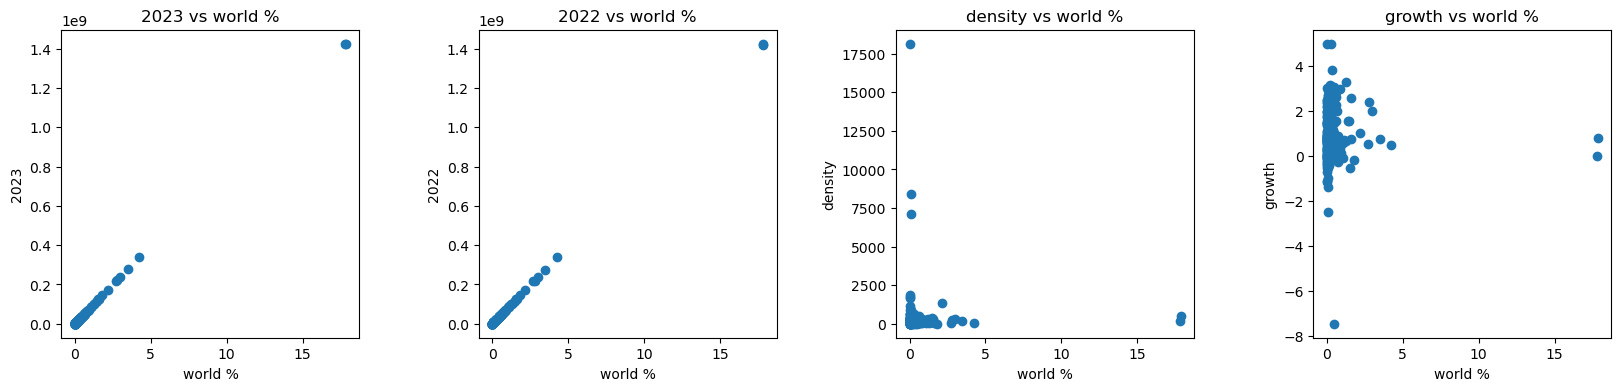

In [282]:
plt.figure(figsize=(20,4))

yaxis = ["2023", "2022", "density", "growth"]
i = 1
for col in yaxis:
    plt.subplot(1, 4, i)
    plt.title(col + " vs world %")
    plt.xlabel("world %")
    plt.ylabel(col)
    plt.scatter(df["world %"], df[col])
    i += 1
plt.subplots_adjust(hspace=0.4,wspace=0.4)

13b. Based on the plot, there are 2 countries that are outliers in terms of world % value.<br>
Use the world % column to find and __print the 2 country names__.<br>
_Only the country names should be printed_.

In [305]:
# using the 1.5IQR formula to identify outliers:
# stats = df["world %"].describe()
# q1 = stats["25%"]
# q3 = stats["75%"]
# lowerbound = q1 - 1.5*(q3-q1)
# upperbound = q3 + 1.5*(q3-q1)
# outliers = df[(df["world %"] <  lowerbound) | (df["world %"] > upperbound)]
# outliers

# it seems the 2 outliers are the top two countries in world %
print("World % outlier countries:")
print(", ".join(df.sort_values(by= "world %", ascending= False).head(2).index))

World % outlier countries:
India, China


13c. Observing the 4 subplots above, and using the 2 countries with outlier world % values as your reference, create a Raw NBConvert cell to __explain whether there is correlation between the world % and each of the other 4 columns__.

In [ ]:
### good analysis